In [1]:
import numpy as np
import matplotlib.pyplot as plt

# STARBURST99 stellar population synthesis models
* This is based on a simulation for a fixed mass star custer run on [STScI web interface](http://www.stsci.edu/science/starburst99/docs/default.htm)
* Output files can be found at `./data/`

In [2]:
Mcluster=1.e3

In [3]:
snrfile='./data/Mfixed3.snr1'

snrdata=np.loadtxt(snrfile,skiprows=7)
time=snrdata[:,0] # age of cluster (yr)
snr=10.**snrdata[:,1] # number of SNe/yr
snr=snr/Mcluster*1.e6 # convert to number of SNe/M_sun/Myr
# make tiny number to zero
ind=snrdata[:,1] == -30
snr[ind]=0.0 



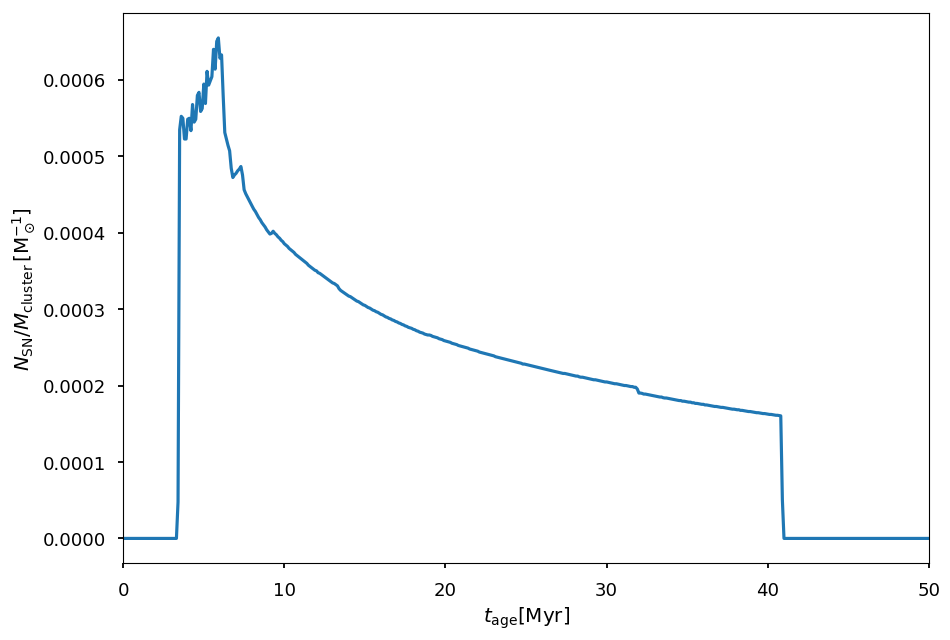

In [4]:
with plt.style.context('seaborn-talk','fivethrityeight'):
    plt.plot(time/1.e6,snr)
    plt.ylabel(r'$N_{\rm SN}/M_{\rm cluster}\,[{\rm M_\odot^{-1}}]$')
    plt.xlabel(r'$t_{\rm age} [{\rm Myr}]$')
    plt.xlim(0,50)

In [5]:

ind=snrdata[:,-2] == -30
allpower=10.**snrdata[:,-2] # Lmech
allpower[ind]=0.0
allpower=allpower/Mcluster # Lmech/Mcluster

powerfile='/Users/ckim/Sources/Starburst99/output/Mfixed3.power1'
pdata=np.loadtxt(powerfile,skiprows=7)
power=10.**pdata[:,1] # Lmech,wind
ind=pdata[:,1] == -30
power[ind]=0.0

windpower=power/Mcluster # convert to Lmech,wind/Mcluster
snpower=allpower-windpower

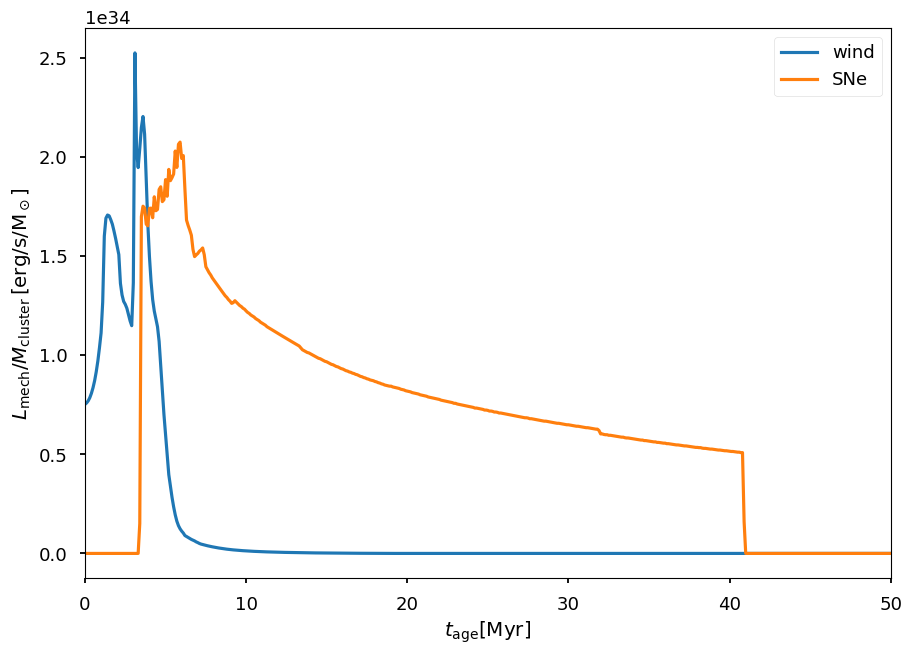

In [6]:
with plt.style.context('seaborn-talk','fivethrityeight'):
    plt.plot(time/1.e6,windpower,label='wind')
    plt.plot(time/1.e6,snpower,label='SNe')
    plt.ylabel(r'$L_{\rm mech}/M_{\rm cluster}\,[{\rm erg/s/M_\odot}]$')
    plt.xlabel(r'$t_{\rm age} [{\rm Myr}]$')
    plt.xlim(0,50)
    plt.legend()